In [1]:
# dependencies

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Reading Data from csv

    ID: Unique identifier for each patient.
    
    age: Age of the patient in days.
    
    age_years: Age of the patient in years (derived from age).
    
    gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
    
    height: Height of the patient in centimeters.
    
    weight: Weight of the patient in kilograms.
    
    ap_hi: Systolic blood pressure.
    
    ap_lo: Diastolic blood pressure.
    
    cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
    
    alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
    
    active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
    
    cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
    
    bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
    
    bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
    
    bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [3]:
data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\vscode - Copy\vscode - Copy\Cardio_Dataset.csv')
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Data preprocessing

In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [5]:
df.shape

(68205, 17)

In [6]:
cols_to_remove = ['id','age','bp_category_encoded','bp_category']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [7]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.8 MB


In [9]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

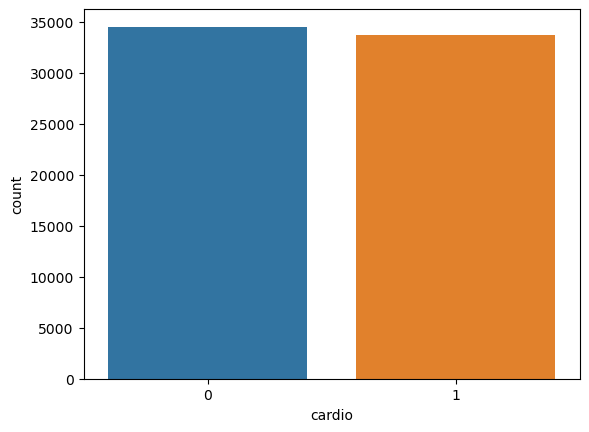

In [10]:
sns.countplot(data=df,x='cardio')

In [11]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Correlations

In [12]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi'],
      dtype='object')

In [13]:
categorical = ['gender','cholesterol', 'gluc',
                'smoke', 'alco', 'active', 'cardio']

numerical = [col for col in df.columns if col not in categorical]

numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [14]:
corr = df[numerical].corr()

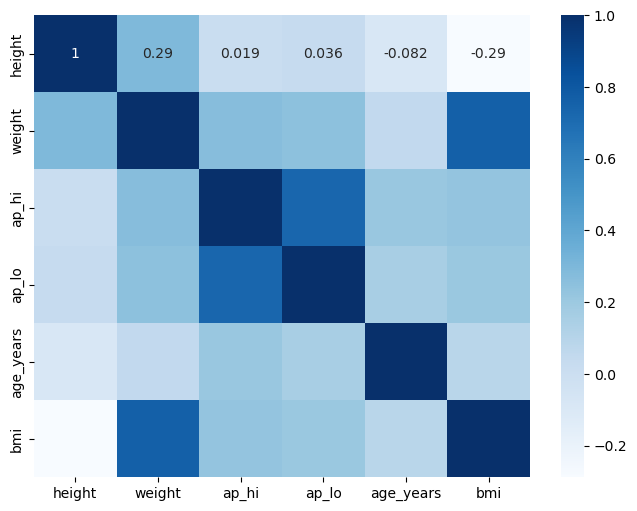

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='Blues')

plt.savefig('correaltion-heatmap.jpg')

Columns Distribution and Outliers

In [16]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

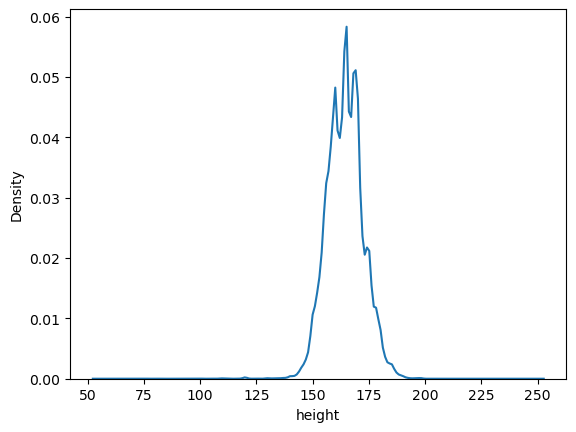

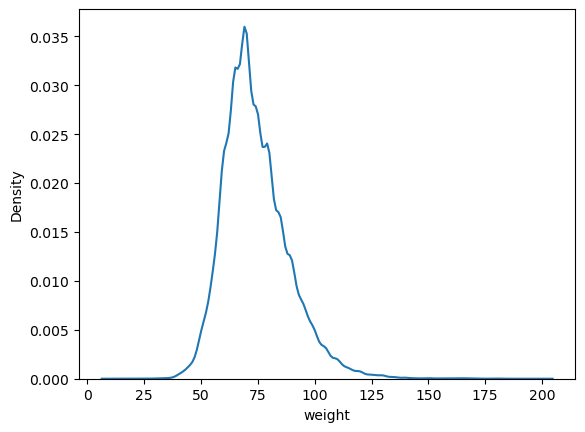

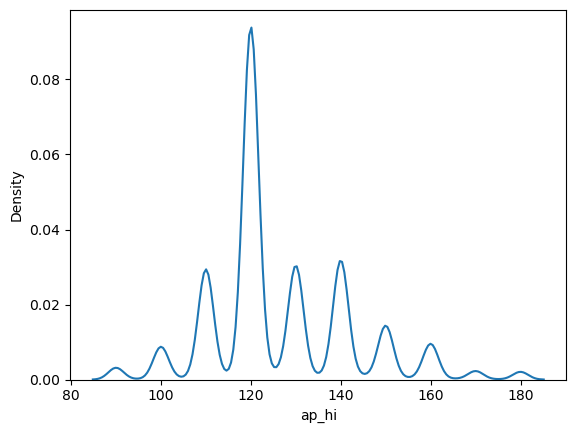

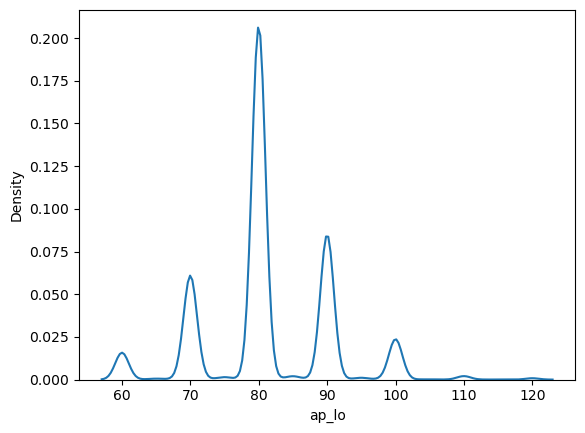

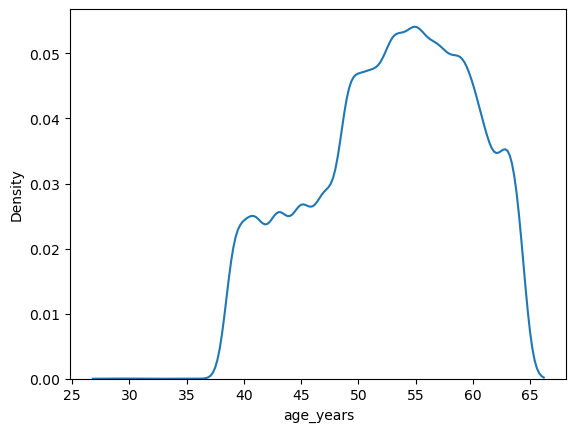

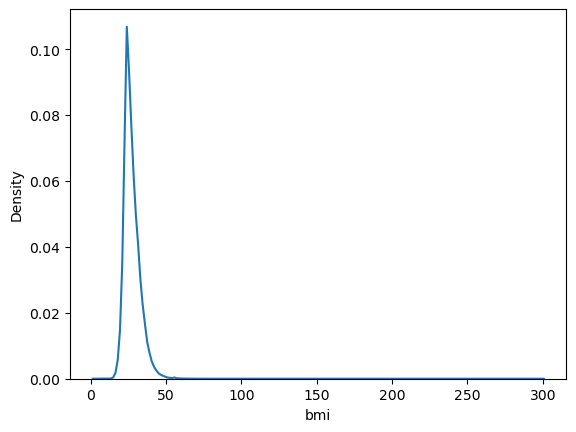

In [17]:
for col in numerical:
    plt.figure()
    sns.kdeplot(df[col])

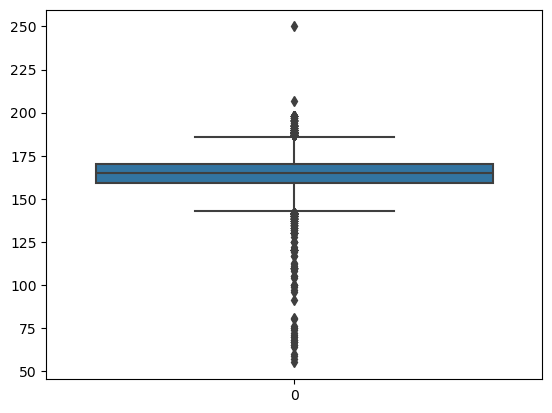

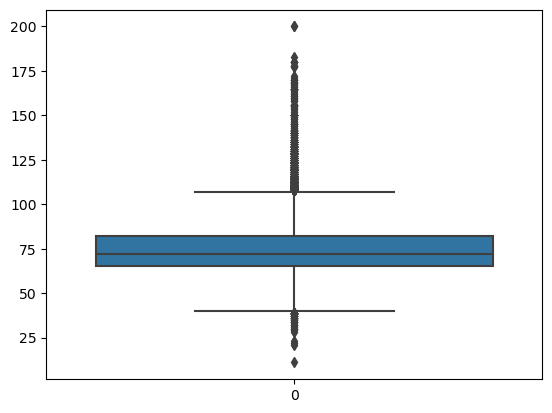

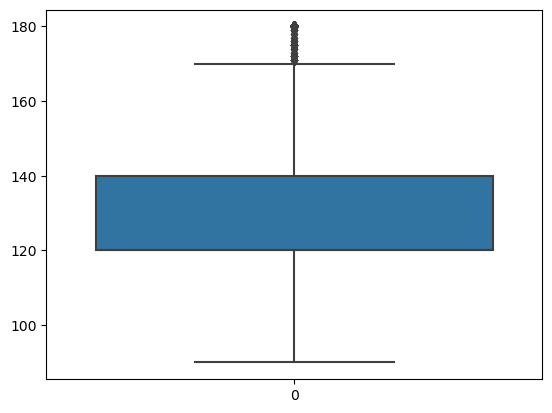

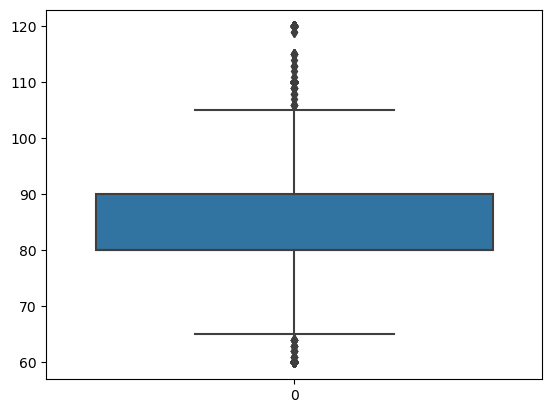

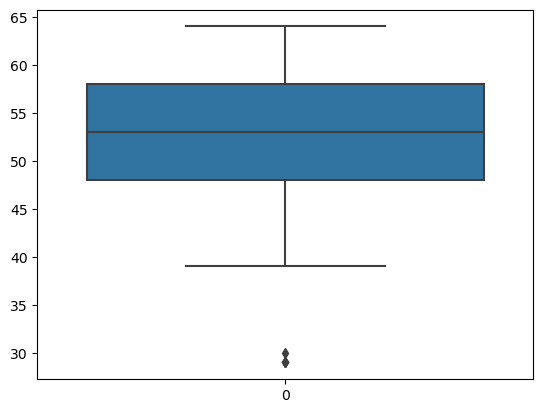

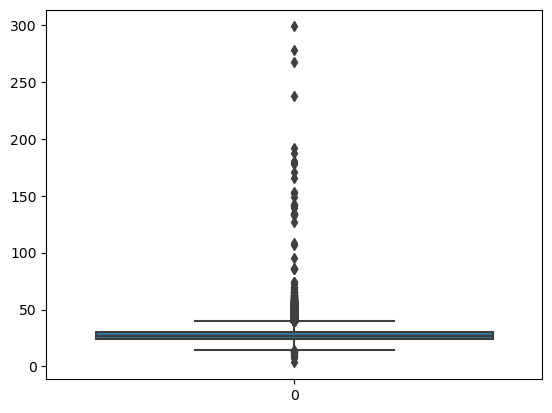

In [18]:
for col in numerical:
    plt.figure()
    sns.boxplot(df[col])

Height Column

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

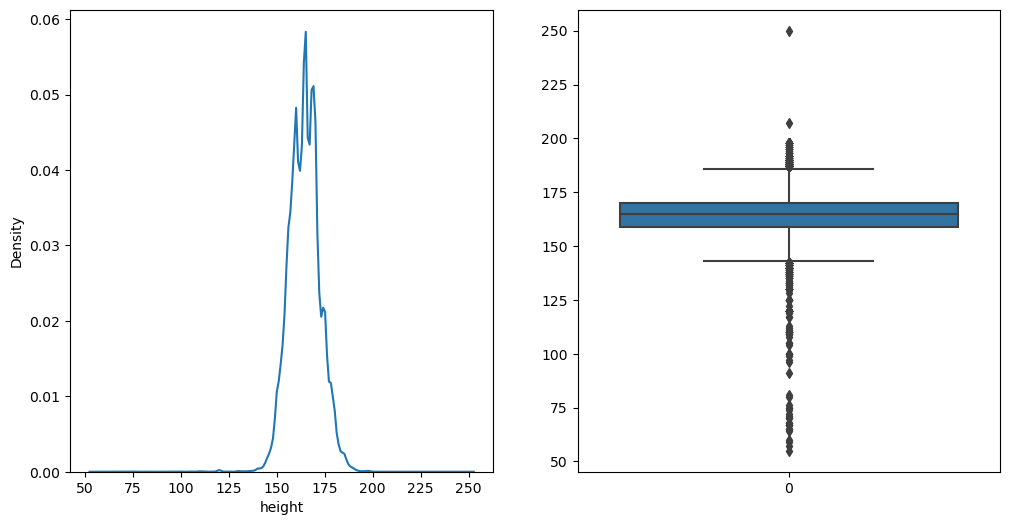

In [19]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])

In [20]:
# IQR, Boundary Values, pciles, yeojohnson

# df['height_log'] = np.log1p(df['height'])

In [21]:
# fig,axs = plt.subplots(1,2)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# sns.kdeplot(df['height_log'],ax=axs[0])
# sns.boxplot(df['height_log'],ax=axs[1])

In [22]:
# pt = PowerTransformer()

# df['height_yj'] = pt.fit_transform(df['height'].values.reshape(-1,1))

# fig,axs = plt.subplots(1,2)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# sns.kdeplot(df['height_yj'],ax=axs[0])
# sns.boxplot(df['height_yj'],ax=axs[1])

In [83]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,-1.036468


In [84]:
df.drop(df.columns[-2:],axis=1,inplace=True)

In [85]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


Splitting the data

In [23]:
X = df.drop('cardio',axis=1)
y = df['cardio']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [25]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi
22079,1,162,65.0,130,90,1,1,0,0,1,51,24.767566
54280,1,153,60.0,140,80,3,1,0,0,1,60,25.631167
31548,2,165,69.0,150,90,1,1,0,0,1,64,25.344353
65878,1,150,69.0,140,80,3,2,0,0,1,60,30.666667
39233,1,150,73.0,140,90,2,1,0,0,0,60,32.444444


Scaling the numerical columns

In [26]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [27]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical)],
                        remainder='passthrough')

In [28]:
X_train_transformerd = ct.fit_transform(X_train)

In [29]:
X_train_transformerd

array([[-0.27272727, -0.41176471,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [-1.09090909, -0.70588235,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.17647059,  1.5       , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.54545455,  0.17647059,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09090909,  1.64705882,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [30]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi', 'remainder__gender',
       'remainder__cholesterol', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco', 'remainder__active'], dtype=object)

In [31]:
pd.DataFrame(data=X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__age_years,robsc__bmi,remainder__gender,remainder__cholesterol,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,-0.272727,-0.411765,0.5,1.0,-0.2,-0.252989,1.0,1.0,1.0,0.0,0.0,1.0
1,-1.090909,-0.705882,1.0,0.0,0.7,-0.114615,1.0,3.0,1.0,0.0,0.0,1.0
2,0.000000,-0.176471,1.5,1.0,1.1,-0.160571,2.0,1.0,1.0,0.0,0.0,1.0
3,-1.363636,-0.176471,1.0,0.0,0.7,0.692214,1.0,3.0,2.0,0.0,0.0,1.0
4,-1.363636,0.058824,1.0,1.0,0.7,0.977064,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51148,0.181818,1.352941,1.0,1.0,0.9,1.236500,2.0,2.0,2.0,0.0,0.0,0.0
51149,0.545455,-0.176471,0.0,0.0,0.5,-0.440546,2.0,1.0,1.0,0.0,0.0,0.0
51150,-0.545455,0.176471,1.0,1.0,0.3,0.531966,1.0,2.0,1.0,0.0,0.0,0.0
51151,2.090909,1.647059,1.0,1.0,0.9,0.311941,2.0,3.0,1.0,0.0,0.0,1.0


In [32]:
X_test_transformerd = ct.transform(X_test)

In [33]:
# X_test_transformerd
X_train_transformerd.shape

(51153, 12)

In [34]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi', 'remainder__gender',
       'remainder__cholesterol', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco', 'remainder__active'], dtype=object)

In [35]:
# X_train.columns >> ColumnTransformer >> Prediciton

Training The Model

* Decision Tree Classifier
* RandomForest
* Xgboost

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformerd,y_train)
pred = dtc.predict(X_test_transformerd)

In [38]:
pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [40]:
print(accuracy)
print(recall)

0.6321252638986629
0.6096896470030798


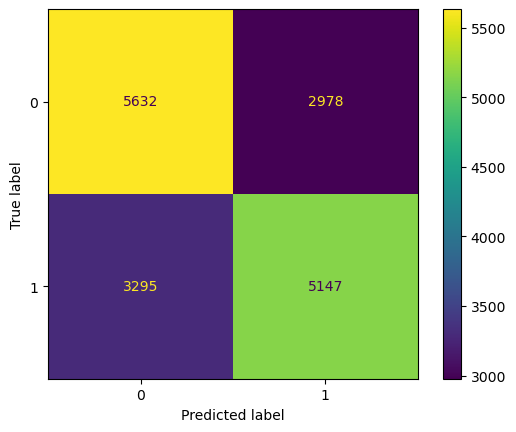

In [41]:
ConfusionMatrixDisplay(cm).plot()

In [42]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dtc2.fit(X_train_transformerd,y_train)
pred = dtc2.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [43]:
print(accuracy)
print(recall)

0.7277152240206427
0.6247334754797441


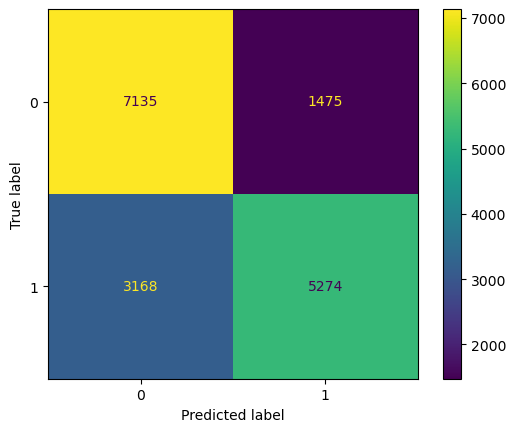

In [44]:

ConfusionMatrixDisplay(cm).plot()

HypertTuning Decision Tree

In [45]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
param_dict = {
                'criterion': ['gini','entropy'],
                'max_depth': [5,6,7],
                'max_features': [7,8,9,10,12,15],
                'min_samples_split': [8,10,12],
                }

randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randomcv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [47]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7239619985925405


In [48]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7713206450675577


In [49]:
randomcv.best_params_

{'min_samples_split': 12,
 'max_features': 8,
 'max_depth': 6,
 'criterion': 'gini'}

In [50]:
best_dtc = randomcv.best_estimator_

In [51]:
best_dtc.fit(X_train_transformerd,y_train)
best_pred = best_dtc.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7298264133239503
0.7550884661434083


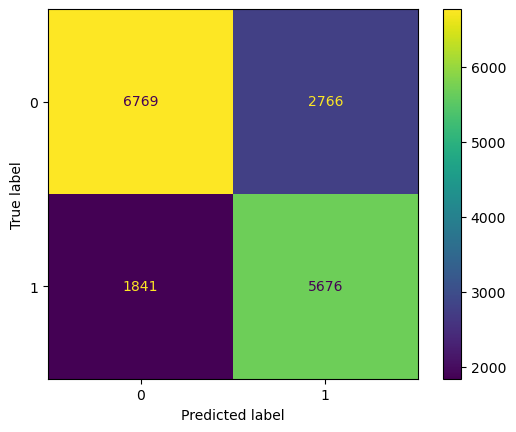

In [52]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [53]:
best_dtc

DecisionTreeClassifier(max_depth=6, max_features=8, min_samples_split=12)

Prototyping for User Input for unseen data

In [54]:
# best_dtc.predict()

X_train_transformerd.shape

(51153, 12)

In [55]:
X_train.shape

(51153, 12)

In [56]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi'],
      dtype='object')

In [57]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [58]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi'],
      dtype='object')

In [59]:
# gender = int(input('M/F').lower())
# height = int(input('heigh in cms'))
# weight = int(input('Weight in Kg'))
# ap_hi = int(input('Ap_hi'))
# ap_lo = int(input('ap_lo'))
# cholestrol = int(input('Cholestrol: Normal,Above Normal,Well Above Normal').lower())
# gluc = int(input('Gluc: Normal,Above Normal,Well Above Normal').lower())
# smoke = int(input('Smoker or Non-smoker').lower())
# alco = int(input('Alco: Yes/No').lower())
# active = int(input('Active: yes/no').lower())
# age = int(input('Age in years'))
# bmi = float(input('Bmi'))
# bp_cat = input('Bp Category: "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis"')



# # gender
# if gender=='m':
#     gen = 2
# else:
#     gen=1

# #cholestrol
# if cholestrol=='normal':
#     chol=1
# elif cholestrol=='above normal':
#     chol=2
# elif cholestrol=='well above normal':
#     chol=3



In [60]:
# userinput_num = [gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,age,bmi]
# userinput_cat = [bp_cat]

In [61]:
# arrayinputs_num = np.array(userinput_num).reshape(1,-1)
# arrayinputs_cat = np.array(userinput_cat).reshape(1,-1)

In [62]:
# ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),arrayinputs_num),
#                                      ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),arrayinputs_cat)],
#                         remainder='passthrough')

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [64]:
rfc.fit(X_train_transformerd,y_train)
pred = rfc.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

0.7050785831574009
0.6866856195214405


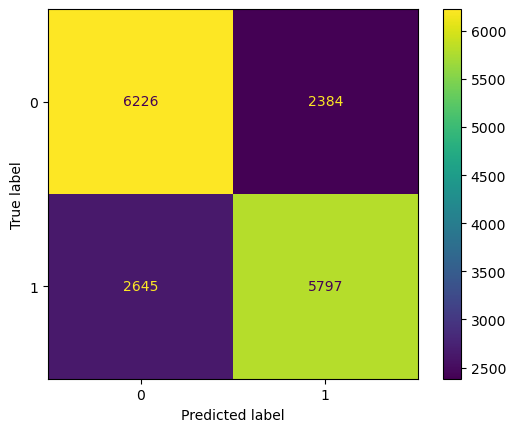

In [66]:
print(accuracy)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [67]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
params = {
        'criterion': ['gini','entropy'],
        'max_depth': [5,7,9,10,12,13],
        'min_samples_split': [5,7,8,10,12,15],
        'n_estimators': [50,100,120,150,170,200]}

In [69]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=rfc)

randomised_cv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'min_samples_split': [5, 7, 8, 10, 12,
                                                              15],
                                        'n_estimators': [50, 100, 120, 150, 170,
                                                         200]})

In [70]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7311752287121746


In [71]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7638850889192886


In [72]:
randomised_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'max_depth': 10,
 'criterion': 'entropy'}

In [73]:
best_rfc = randomised_cv.best_estimator_

In [74]:
best_rfc.fit(X_train_transformerd,y_train)
best_pred = best_rfc.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7307060755336617
0.7623330607795039


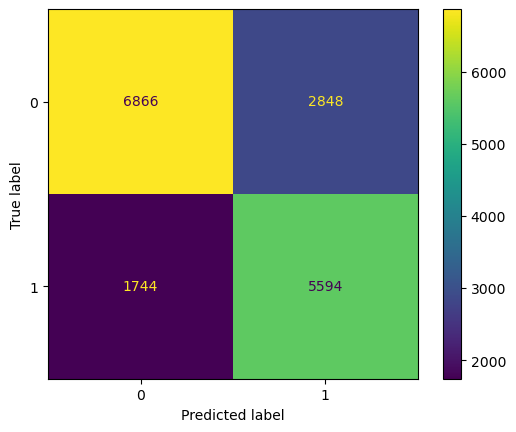

In [75]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [76]:
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=12,
                       n_estimators=200)

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier()
xgb.fit(X_train_transformerd,y_train)
pred = xgb.predict(X_test_transformerd)
acc = accuracy_score(pred,y_test)
rec = recall_score(pred,y_test)
cm = confusion_matrix(pred,y_test)

0.7264250527797326
0.7481277098935751


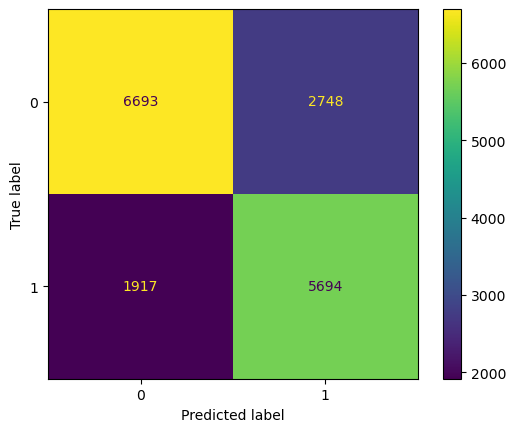

In [79]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [80]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [81]:
params = {'objective': ['binary:logistic'],
 'gamma':[0.1,0.2,0.5,0.6],
 'learning_rate': [0.01,0.001,0.1],
 'max_depth': [5,7,9,10,12,13],
 'n_estimators': [50,80,100,110,120,150,160,170]}

In [82]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=xgb)

randomised_cv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0.1, 0.2, 0.5, 0.6],
                                        'learning_rate': [0.01, 0.001, 0.1],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'n_estimators': [50, 80, 100, 110, 120,
                                                         150, 160, 170],
                                        'objective': ['binary:logistic']})

In [83]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.730882007975604
0.7515341428384906


In [84]:
randomised_cv.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 160,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [85]:
best_xgb = randomised_cv.best_estimator_

In [86]:
best_xgb.fit(X_train_transformerd,y_train)
best_pred = best_xgb.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.730882007975604
0.7515341428384906


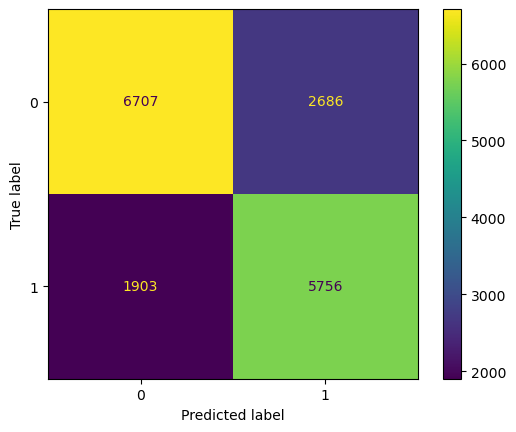

In [87]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [88]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
import pickle
pickle.dump(best_xgb,open('xgb_classifier.pkl','wb'))